# Prototyping part 2 - Javier Sanchez

### Working Hypothesis: My hypothesis is that in general, meat is the worst option for the environment in terms of CO2 and changing to a all/mostly meat free diet will be the best way to reduce our emissions as consumers as well as farmers. 

#### Secondary goal: what type of food provides the most protein while mainating low carbon-footprint or land size, as well as finding which type of food require less fresh water to produce.

github link: https://github.com/JavSanchez97/CDS490Research/blob/main/CDS490HW3Prototyping2.ipynb

In [6]:
#import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Loading up the data and creating a dataset as well as checking to make sure it worked with .head()
foodDf = pd.read_csv("Food_Production.csv")
print (foodDf.shape)

foodDf.head()

(43, 23)


,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [8]:
#this is just to get a quick average
avgLandUse = foodDf["Land use change"].mean()
print(avgLandUse)

1.26046511627907


This gives use the average land use change, which is the Kilogram CO2 equivalents per Kg of product produced. 

Now let's move on to ordering the food product to see which gives us the most and least CO2 per Kg of product

Text(0.5, 0, 'Kg CO2 per Kg of product w/ line at Avg')

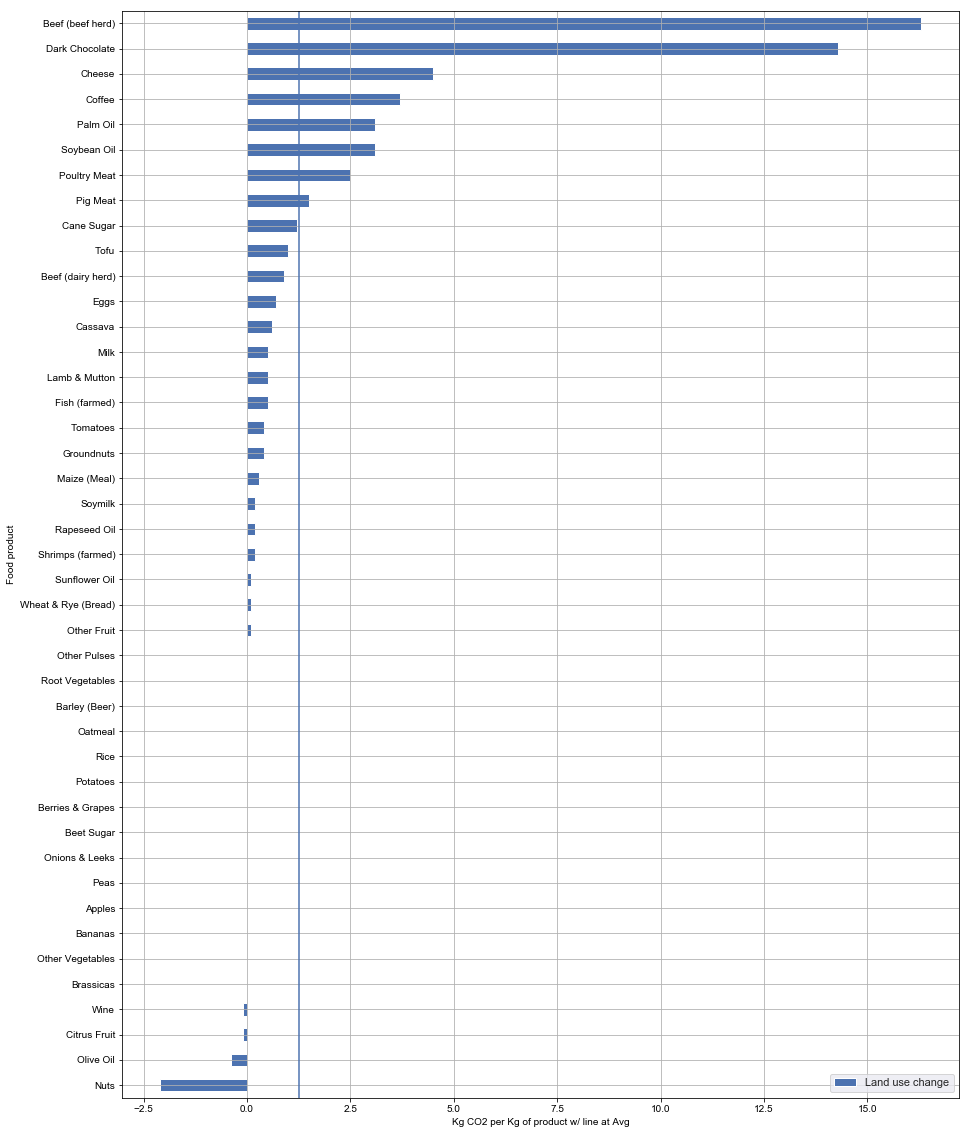

In [9]:
#This creates a quick lineplot to see which procucts use the most land/Kg of CO2 
#and orders them from High to Low to see which use the most land but also create more CO2
descendingLUC_DF = foodDf.sort_values(by = 'Land use change', ascending = True).iloc[:,:2] #do 2

fig, ax = plt.subplots(figsize=(15,20))
plt.axvline(1.26046511627907,0)
sns.set()
descendingLUC_DF.set_index('Food product').plot(kind='barh', stacked = True, ax = ax)
plt.xlabel('Kg CO2 per Kg of product w/ line at Avg')

With this, we see that there are only 8 grown items that are above this average of 1.26046511627907, 3 of these being meats (37.5%)

Now to find the average of the Total emissions of these items and compare

In [10]:
#this just gets the average of all emissions created
avgTotEmiss = foodDf["Total_emissions"].mean()
print(avgTotEmiss)

5.972093023255814


Text(0.5, 0, 'Total emissions & category w/ line at Avg')

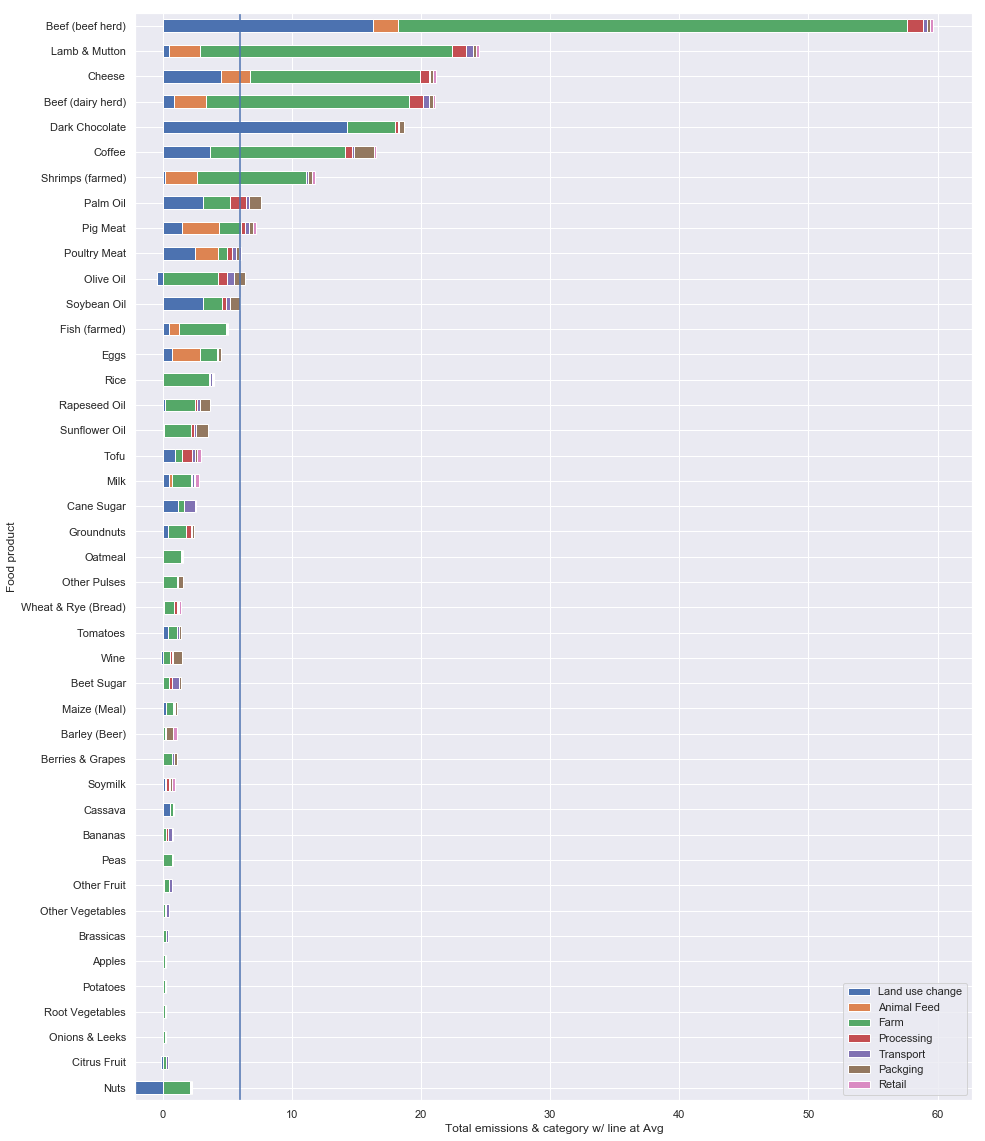

In [11]:
#to get another line plot from colomns 1-8
descendingEmiss_DF = foodDf.sort_values(by = 'Total_emissions', ascending = True).iloc[:,:8]

fig, ax = plt.subplots(figsize=(15,20))
plt.axvline(5.9720930232558125,0)
sns.set()
descendingEmiss_DF.set_index('Food product').plot(kind='barh', stacked = True, ax = ax)
plt.xlabel('Total emissions & category w/ line at Avg')

After reviewing all of the emissions, 12 are above the average.
This time there are 6 types of meat, which is 50%

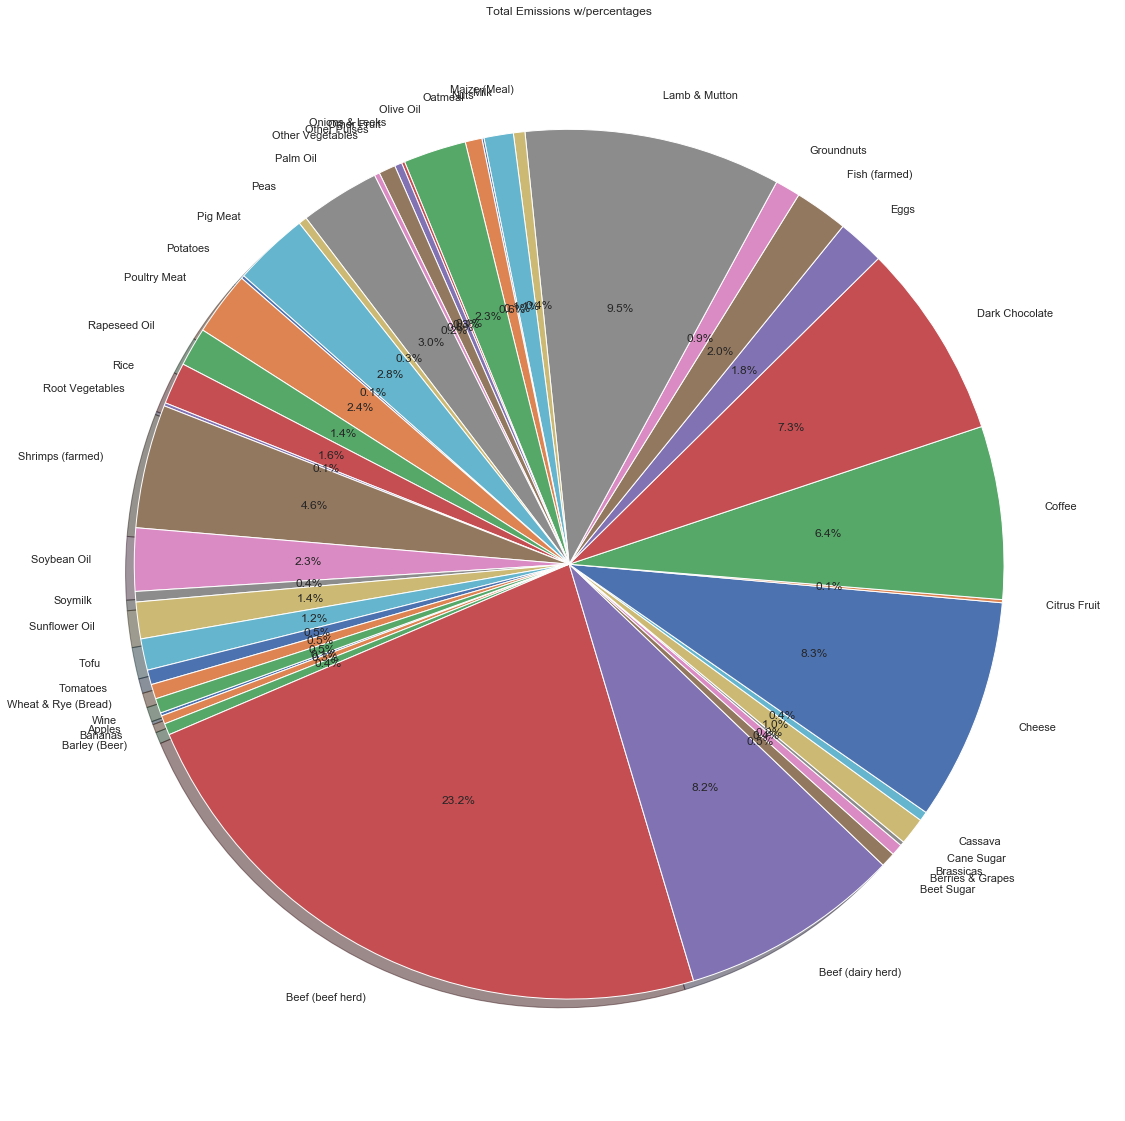

In [12]:
#pie chart with percentages included in the pie
plt.figure(figsize = (20,20))
pieDf = foodDf.groupby('Food product')['Total_emissions'].sum()
labels = (np.array(pieDf.index))
sizes = (np.array((pieDf / pieDf.sum())*100))
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle = 200, shadow = True)
plt.title('Total Emissions w/percentages')
plt.show()

This pie chart above serves it's purpose by showing which products produce the most emissions in comparisons to the rest, as well as easily identifying the sources that emmit the most emissions. 

# Methods added

To get started on the new methods, I think it would best to separate the dataset a bit into Vegan / non-Vegan.

In [13]:
#this creates a dataframe from the original dataset with only non-vegan items
MeatDf = foodDf[33:43]
print (MeatDf.shape)
MeatDf.head()

(10, 23)


,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
33,Beef (beef herd),16.3,1.9,39.4,1.3,0.3,0.2,0.2,59.6,110.406593,...,727.783350,1451.2,36.439560,49.889669,119.490842,326.21,163.595787,34732.5,17418.505520,12722.52747
34,Beef (dairy herd),0.9,2.5,15.7,1.1,0.4,0.3,0.2,21.1,133.805861,...,1375.025329,2714.3,12.197802,16.869301,15.838828,43.24,21.904762,119805.2,60691.590680,43884.68864
35,Lamb & Mutton,0.5,2.4,19.5,1.1,0.5,0.3,0.2,24.5,30.640379,...,900.949525,1802.8,12.529968,19.850075,116.659306,369.81,184.812594,141925.0,70927.036480,44771.29338
36,Pig Meat,1.5,2.9,1.7,0.3,0.3,0.3,0.2,7.2,31.958159,...,1109.888752,1795.8,5.150628,7.608158,7.263598,17.36,10.729295,66867.4,41327.194070,27977.99163
37,Poultry Meat,2.5,1.8,0.7,0.4,0.3,0.2,0.2,6.1,26.324324,...,381.062356,660.0,5.335135,5.698614,6.605405,12.22,7.055427,14177.9,8185.854503,7663.72973


In [14]:
#this creates a dataframe from the original dataset with only vegan items
VegDf= foodDf[0:33]
print (VegDf.shape)

VegDf.head()

(33, 23)


,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


By separating the two by non-vegan or vegan, we can now get a clearer picture of what causes the most emissions for both categories.

### Meat Pie Chart

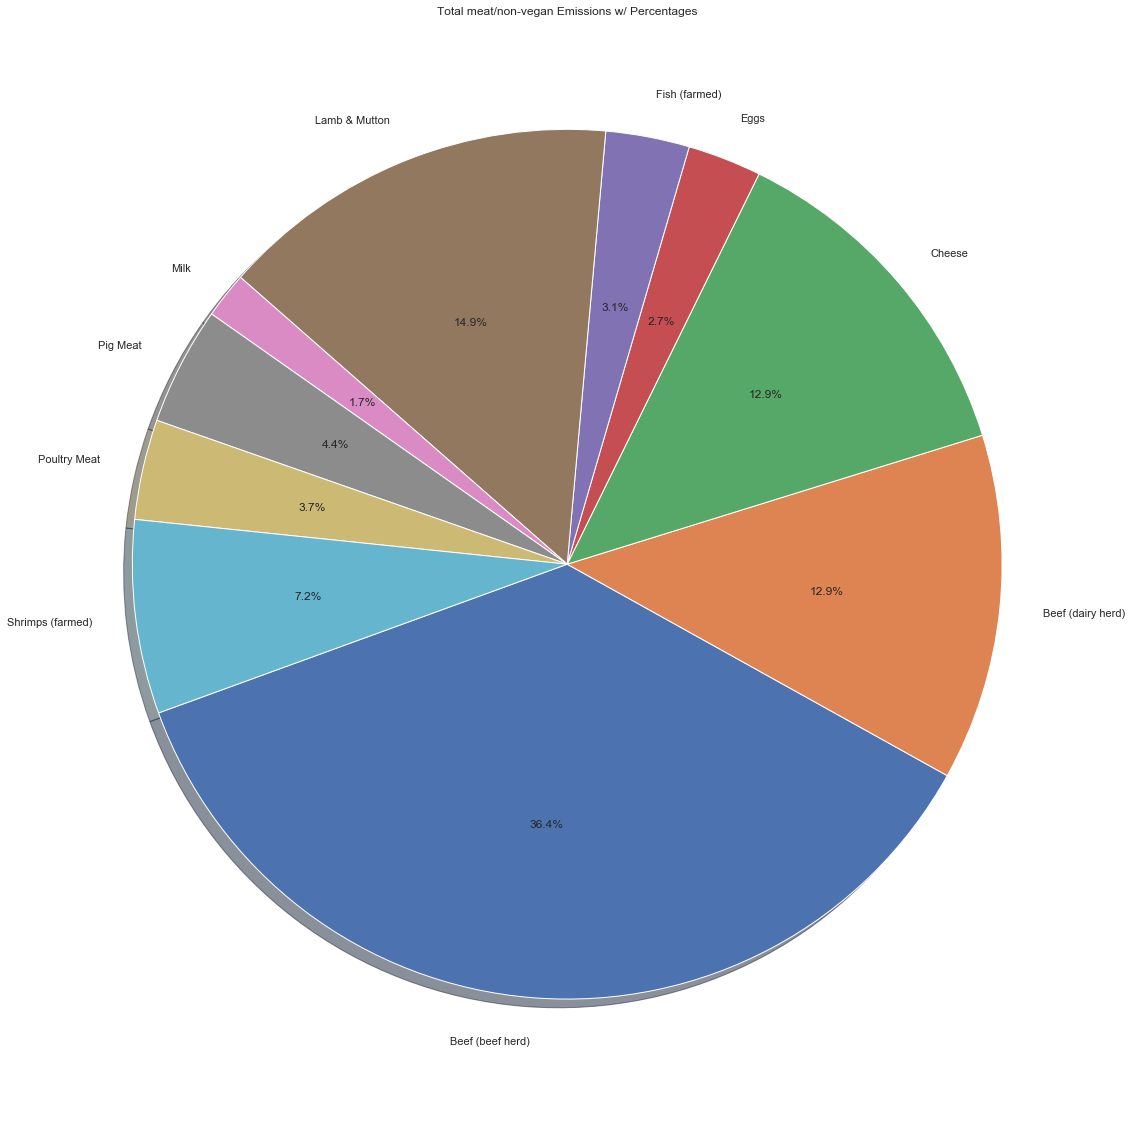

In [15]:
#pie chart
plt.figure(figsize = (20,20))
MeatpieDf = MeatDf.groupby('Food product')['Total_emissions'].sum()
labels = (np.array(MeatpieDf.index))
sizes = (np.array((MeatpieDf / MeatpieDf.sum())*100))
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle = 200, shadow = True)
plt.title('Total meat/non-vegan Emissions w/ Percentages')
plt.show()

Now that it has been separated, it is much easier to see at a quick glance what meats are causing the biggest issue thanks to this pie chart. Beef, in terms of meat, diary, milk, and cheese are all the greatest contributors to total emissions with cow related emissions totaling 63.9% of all emissions! The only other meat in this same category that was even close was Lamb/Mutton. This makes it clear just which two animals can create the most emissions.

### Fruit & Vegetable Pie Chart

It is also best to see if there are any vegetables that can cause significant emissions in comparison to the other non-meat products

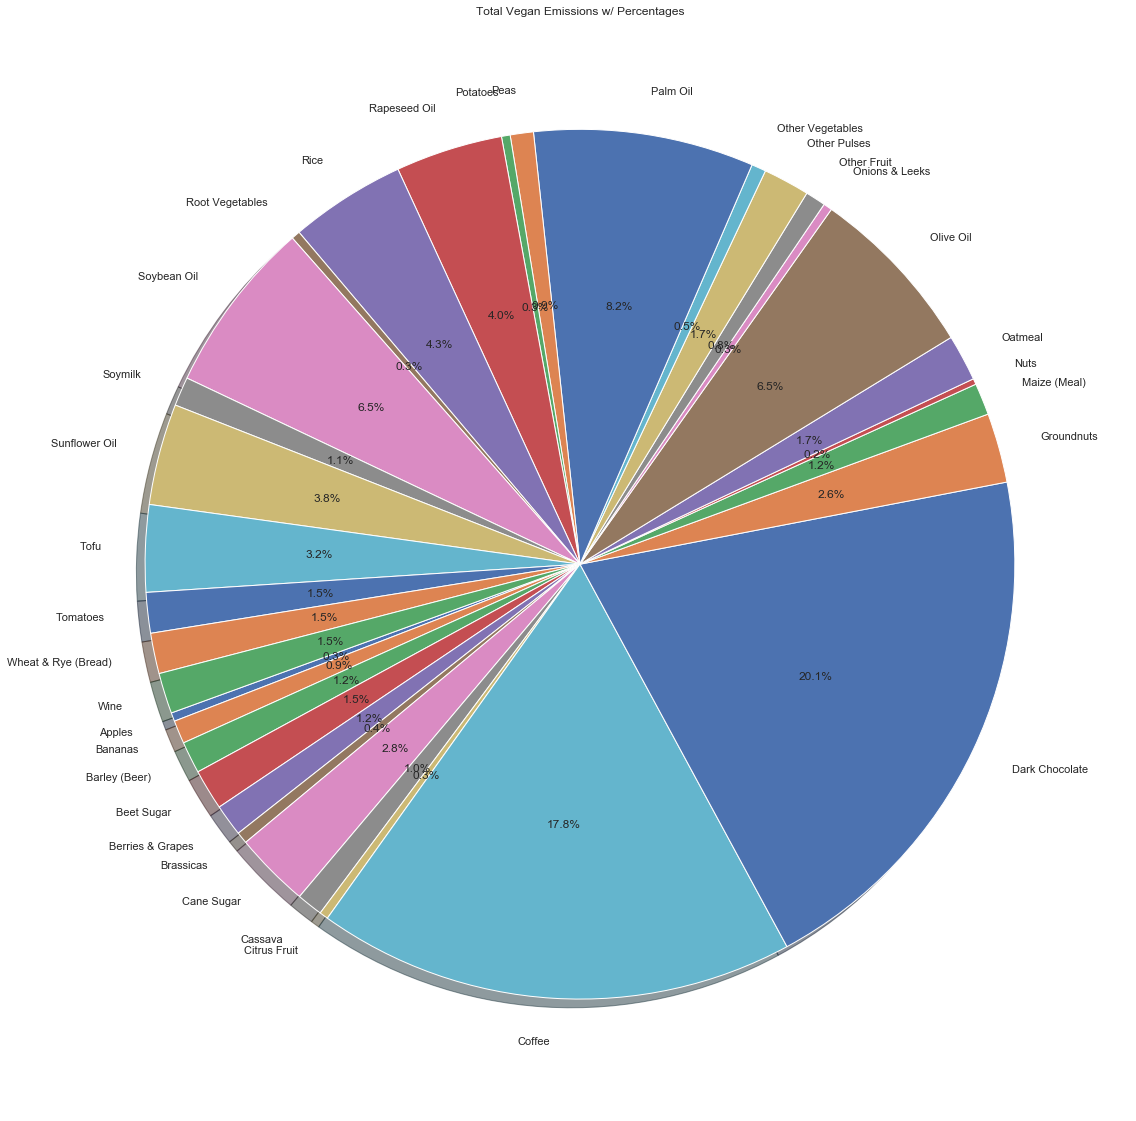

In [16]:
#pie chart
plt.figure(figsize = (20,20))
VeggiepieDf = VegDf.groupby('Food product')['Total_emissions'].sum()
labels = (np.array(VeggiepieDf.index))
sizes = (np.array((VeggiepieDf / VeggiepieDf.sum())*100))
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle = 200, shadow = True)
plt.title('Total Vegan Emissions w/ Percentages')
plt.show()

This pie chart of Vegan items show us that the significant contributors of emissions for this category are Chocolate and Coffee

Now let's introduce another dataset that gives us food consumption(Kg / person / year) and CO2 emissions (Kg CO2/person/year)

### New Data

In [17]:
#this new dataset focuses more on consumption
ConsumpDf = pd.read_csv("Food_consumption.csv")
print (ConsumpDf.shape)

ConsumpDf.head()

(1430, 4)


,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


Next I will make a ridge plot in order to greater show the emissions of some of the food mentioned above

### Ridge Plot

In [22]:
#to not have too much noise, I will set a lower limit of 5
ConsumpDf = ConsumpDf.query('co2_emmission>10')
#Next I perform a log10 in order to minimize the skewness and to stabalize the data
ConsumpDf['co2_emission'] = ConsumpDf['co2_emmission'].apply('log10')

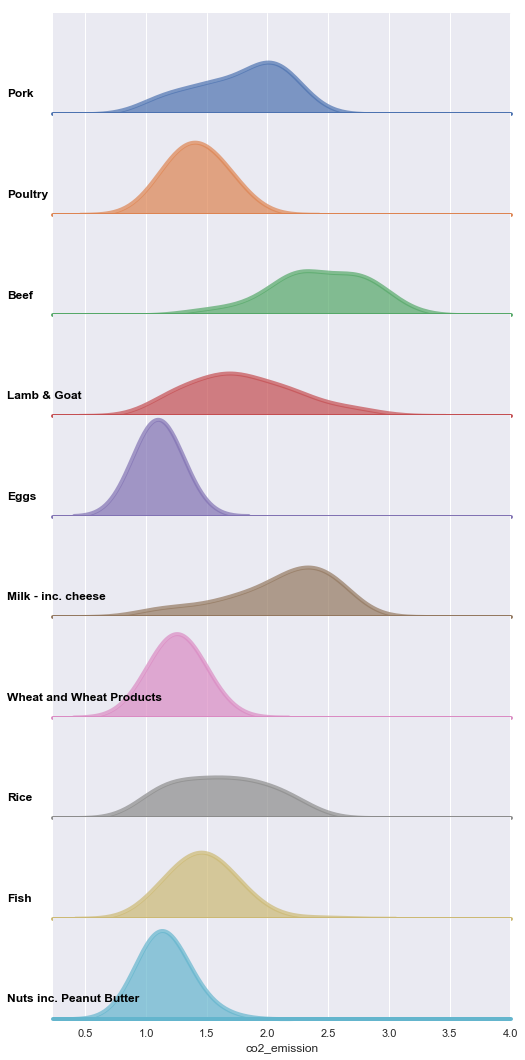

In [24]:
#to label each subplot easier
def label(x, color, label):
    ax = plt.gca()
    ax.text(-0.1, 0.2, label, fontweight = 'bold', color = 'black',
           ha='left', va='center', transform=ax.transAxes)
#to initialize the facetgrid
foodRidge = sns.FacetGrid(ConsumpDf, row='food_category', hue = 'food_category', aspect = 5, height = 1.5)
foodRidge.map(sns.kdeplot, 'co2_emission', clip_on=False, shade=True, alpha=.7, lw=4, bw=.2)
foodRidge.map(plt.axhline, y=0, lw=4, clip_on=False)
foodRidge.map(label, 'co2_emission')
#to overlap the subplots
foodRidge.fig.subplots_adjust(hspace=-0.01)
foodRidge.set_titles('')
foodRidge.set(yticks=[])
foodRidge.despine(bottom=True, left=True)
#foodRidge.savefig('Ridge Plot Showing Food Emission of Vegan/Non-Vegan')

The further right the curve goes, the more CO2 is produced in the process. 

With this ridge plot line, it is easy to see that beef/Milk&cheese products create the most CO2, followed by Pork and Lamb/Goat. 

The lowest and most consistent on this list were Nuts, Wheat & their products, and Eggs.

## Difficulites Along the Way

The most difficult part of this is definitely searching for the data. I did not realize how difficult it would be to find datasets that I would be able to use for this project, but so far I have found two that have provided very good information through python. 

## Validation

The way that I am validating my partial results is through the usage of this new dataset as well as the method that I used to back up my claim as worst meat for CO2 emissions. This method shows that of the included food in the second dataset, Beef and the products that come from it are far worse than anything else in comparison

While this new dataset did not contain all of the non-meat options and I was unable to back up my claim of worst in terms of CO2 emissions, It did help confirm which were 'cleanest' in terms of emissions, which are nuts and wheat(and wheat products).

In the future, I will most likely validate these findings by either creating new methods that are more in depth as well as finding more datasets that can support my claim.

## Validation Part 2

What I will do to validate my project even further would be to try and find more datasets that can help prove what I have found about beef and its CO2 emissions. Another way to validate would be to create different methods that assist in visualizing exactly how much CO2 is created and possibly try and compare that to other methods of CO2 emissions, such as how much a car produces or other common items used.